# Simple autoencoder

In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data(img_dir, ending):
    return np.array([cv2.imread(os.path.join(img_dir, img)) for img in os.listdir(img_dir) if img.endswith(ending)])


In [3]:
X_ORG = load_data("3Shapes2_large/", "im1.png")
X_ORG.shape

(8015, 128, 128, 3)

In [4]:
X = X_ORG[:5]
X = X/255

In [15]:
def create_graph():
    input_img = tf.placeholder(dtype=tf.float32, shape=[None,128,128,3], name="input")
    
    logits = tf.contrib.layers.flatten(input_img)
    
    w = tf.Variable(tf.random_normal([(128*128*3),(16*16*3)]))
    b = tf.Variable(tf.zeros((16*16*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.relu(logits)
    
    w = tf.Variable(tf.random_normal([(16*16*3),(8*4*3)]))
    b = tf.Variable(tf.zeros((8*4*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.relu(logits)
    
    ## Do the sampling
    # get mean and log_variance
    mean = tf.slice(logits, begin=[0, 0], size=[1, int(8*4*3/2)])
    mean = tf.Print(mean, [mean], "mean:")
    stddev = tf.slice(logits, begin=[0, int(8*4*3/2)], size=[1, int(8*4*3/2)])
    
    # do sampling
    logits = tf.random_normal(shape=mean.shape.as_list(), mean=mean, stddev=stddev)
    logits = tf.Print(logits, [logits])
                                      
    #uncompressing
                                      
    w = tf.Variable(tf.random_normal([(4*4*3),(16*16*3)]))
    b = tf.Variable(tf.zeros((16*16*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.relu(logits)
                                      
    w = tf.Variable(tf.random_normal([(16*16*3),(128*128*3)]))
    b = tf.Variable(tf.zeros((128*128*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.sigmoid(logits)
    
    logits = tf.reshape(logits, [-1, 128,128,3])
    
    return input_img, logits

In [16]:
def train_fn(x,y):
    loss = tf.reduce_mean(tf.square(x-y))
    optimizer = tf.train.AdamOptimizer(0.01)
    train = optimizer.minimize(loss)
    
    return loss, train

In [17]:
def run(x_train, epochs, num_batches):
    
    org_input, output = create_graph()
    loss, train = train_fn(org_input, output)
    
    with tf.Session() as sess:    
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            print("\nEpoch %i/%i:" % (epoch+1, epochs))
            epoch_loss = 0
            
            for batch in range(num_batches):           
                length = int(x_train.shape[0]/num_batches)
                x = x_train[(batch*length):((batch+1)*lenght if batch+1<num_batches else -1)]
                _, batch_loss = sess.run([train, loss], feed_dict={org_input:x})
                print("\tloss:", batch_loss)
                epoch_loss += batch_loss
            
            print("\tloss:", epoch_loss)
        
        test = output.eval(feed_dict={org_input:X})
        fig, axs = plt.subplots(2)
        axs[0].imshow(X[0])
        axs[1].imshow(test[0])


Epoch 1/20:
	loss: 0.387237
	loss: 0.387237429619

Epoch 2/20:
	loss: 0.385034
	loss: 0.38503408432

Epoch 3/20:
	loss: 0.384765
	loss: 0.384764820337

Epoch 4/20:
	loss: 0.386154
	loss: 0.386153697968

Epoch 5/20:
	loss: 0.382477
	loss: 0.382476955652

Epoch 6/20:
	loss: 0.382979
	loss: 0.382978826761

Epoch 7/20:
	loss: 0.384035
	loss: 0.384034723043

Epoch 8/20:
	loss: 0.384936
	loss: 0.384935945272

Epoch 9/20:
	loss: 0.385568
	loss: 0.385567694902

Epoch 10/20:
	loss: 0.384083
	loss: 0.384083122015

Epoch 11/20:
	loss: 0.384083
	loss: 0.384082704782

Epoch 12/20:
	loss: 0.385928
	loss: 0.385928183794

Epoch 13/20:
	loss: 0.381418
	loss: 0.381418228149

Epoch 14/20:
	loss: 0.384262
	loss: 0.384262174368

Epoch 15/20:
	loss: 0.383603
	loss: 0.383602887392

Epoch 16/20:
	loss: 0.384471
	loss: 0.384471148252

Epoch 17/20:
	loss: 0.385438
	loss: 0.385438203812

Epoch 18/20:
	loss: 0.380449
	loss: 0.380449056625

Epoch 19/20:
	loss: 0.385487
	loss: 0.385487228632

Epoch 20/20:
	loss: 0

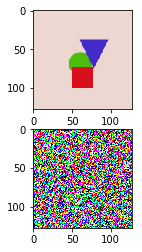

In [18]:
run(X,20,1)